In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [7]:
# Load your dataset
data = pd.read_csv('credit_scoring.csv')

In [8]:
# Identify the target column and features
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median or most_frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [11]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [14]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[6960   51]
 [1698  304]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7011
           1       0.86      0.15      0.26      2002

    accuracy                           0.81      9013
   macro avg       0.83      0.57      0.57      9013
weighted avg       0.82      0.81      0.75      9013



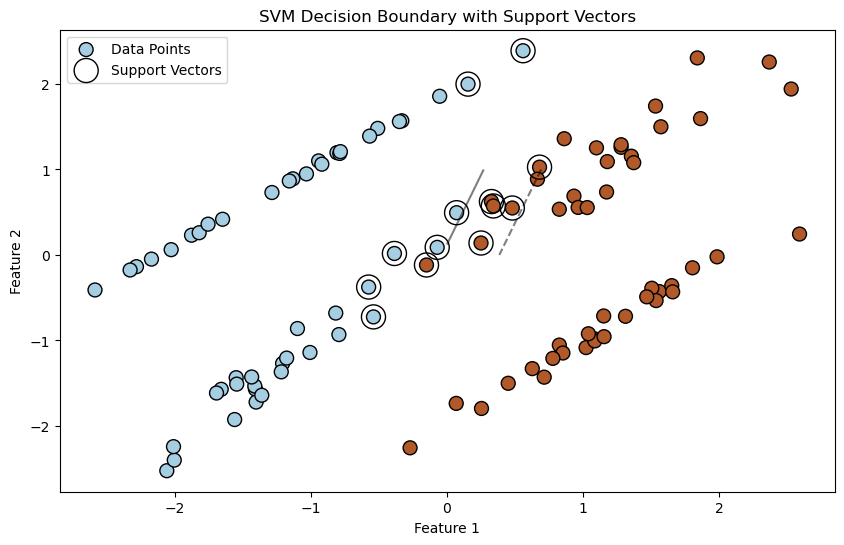

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Fit SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Plot decision boundary and support vectors
plt.figure(figsize=(10, 6))

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, label='Data Points')

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
